In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [4]:
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [5]:
df.shape

(1200, 28)

In [6]:
df.isnull().sum().any()  # There is no missing values in this Dataset

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [8]:
df.describe(include=['O']) # To see the Distribution of Categorical features

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [9]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [10]:
df.duplicated().sum()     # There is duplicate values

0

-----------

# Data Preprocessing

In [11]:
df.drop("EmpNumber", axis = 1, inplace = True)  #We dont need EmpNumber

In [12]:
df["Gender"] = df["Gender"].map({"Female":0,"Male":1})
df["OverTime"] = df["OverTime"].map({"No":0,"Yes":1})
df["Attrition"] = df["Attrition"].map({"No":0,"Yes":1})

In [13]:
df = pd.get_dummies(df)

In [14]:
# to avoid dummy trap lets delete any one values from each dummy columns
df.drop(["EducationBackground_Other","MaritalStatus_Divorced","EmpDepartment_Development",
          "EmpJobRole_Manager","BusinessTravelFrequency_Travel_Rarely"],
        axis = 1,inplace = True)

-----------

# Implementing Machine Learning Models

In [15]:
X = df.drop("PerformanceRating", axis = 1)
y = df["PerformanceRating"]

In [16]:
sm = SMOTE()
sm_X,sm_y = sm.fit_resample(X.astype("float"),y)

In [17]:
print(Counter(y))
print(Counter(sm_y))

Counter({3: 874, 2: 194, 4: 132})
Counter({3: 874, 4: 874, 2: 874})


In [18]:
X_train, X_test, y_train, y_test = train_test_split(sm_X, sm_y, test_size=0.2, random_state = 0)

-----------

### svm

In [19]:
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [20]:
sv_predict = sv.predict(X_test)

In [21]:
print(classification_report(y_test,sv_predict))

              precision    recall  f1-score   support

           2       0.72      0.59      0.65       185
           3       0.57      0.61      0.59       167
           4       0.79      0.88      0.83       173

    accuracy                           0.70       525
   macro avg       0.69      0.70      0.69       525
weighted avg       0.70      0.70      0.69       525



In [22]:
pd.crosstab(y_test,sv_predict)

col_0,2,3,4
PerformanceRating,,,
2,110,59,16
3,40,102,25
4,2,18,153


**<u>Support Vector GridSearchCV</u>**

In [23]:
sv_param = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly', 'sigmoid']}

In [24]:
sv_grid = GridSearchCV(SVC(),sv_param,verbose = 2)
sv_grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   6.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   4.9s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   7.3s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   7.7s
[CV] END ...................

[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   1.3s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   1.2s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.3s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.3s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.3s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.3s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.3s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.1s
[CV] END ...................

[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   4.2s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   7.5s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   6.3s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   4.6s
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=   7.5s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [26]:
sv_grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [27]:
sv_grid_prediction = sv_grid.predict(X_test)

In [28]:
pd.crosstab(y_test,sv_grid_prediction)

col_0,2,3,4
PerformanceRating,,,
2,182,3,0
3,16,144,7
4,1,0,172


In [29]:
print(classification_report(y_test,sv_grid_prediction))

              precision    recall  f1-score   support

           2       0.91      0.98      0.95       185
           3       0.98      0.86      0.92       167
           4       0.96      0.99      0.98       173

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



-------

### KNN

In [30]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
kn_predict = kn.predict(X_test)

In [32]:
print(classification_report(y_test,kn_predict))

              precision    recall  f1-score   support

           2       0.74      0.97      0.84       185
           3       0.97      0.51      0.67       167
           4       0.89      0.99      0.94       173

    accuracy                           0.83       525
   macro avg       0.87      0.83      0.82       525
weighted avg       0.86      0.83      0.82       525



In [33]:
pd.crosstab(y_test,kn_predict)

col_0,2,3,4
PerformanceRating,,,
2,180,3,2
3,62,86,19
4,1,0,172


**<u>KNN Classifier GridSearchCV</u>**

In [34]:
knn_params = { 'n_neighbors' : np.arange(1,31),
               'weights' : ['uniform','distance'],
               'metric' : ['euclidean','manhattan']}

In [36]:
knn_grid = GridSearchCV(KNeighborsClassifier(),knn_params,verbose = 2)
knn_grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=2, w

[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.1s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.1s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=12, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=12, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=12, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean,

[CV] END ..metric=euclidean, n_neighbors=21, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=21, weights=uniform; total time=   0.1s
[CV] END .metric=euclidean, n_neighbors=21, weights=distance; total time=   0.1s
[CV] END .metric=euclidean, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=21, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=22, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=22, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=22, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=22, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=22, weights=uniform; total time=   0.1s
[CV] END .metric=euclidean, 

[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.1s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.1s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.1s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan

[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=12, weights=uniform; total time=   0.1s
[CV] END .metric=manhattan, n_neighbors=12, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=12, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=12, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=12, weights=distance; total time=   0.1s
[CV] END .metric=manhattan, n_neighbors=12, weights=distance; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.1s
[CV] END .metric=manhattan, 

[CV] END .metric=manhattan, n_neighbors=22, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=22, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=22, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=23, weights=uniform; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=23, weights=uniform; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=23, weights=uniform; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=23, weights=uniform; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=23, weights=uniform; total time=   0.1s
[CV] END .metric=manhattan, n_neighbors=23, weights=distance; total time=   0.1s
[CV] END .metric=manhattan, n_neighbors=23, weights=distance; total time=   0.1s
[CV] END .metric=manhattan, n_neighbors=23, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=23, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [37]:
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

In [38]:
knn_grid_prediction = knn_grid.predict(X_test)

In [39]:
pd.crosstab(y_test,knn_grid_prediction)

col_0,2,3,4
PerformanceRating,,,
2,185,0,0
3,38,116,13
4,1,0,172


In [40]:
print(classification_report(y_test,knn_grid_prediction))

              precision    recall  f1-score   support

           2       0.83      1.00      0.90       185
           3       1.00      0.69      0.82       167
           4       0.93      0.99      0.96       173

    accuracy                           0.90       525
   macro avg       0.92      0.90      0.90       525
weighted avg       0.92      0.90      0.90       525



--------------

### Random Forest

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
rf_predict = rf.predict(X_test)

In [44]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       185
           3       0.94      0.96      0.95       167
           4       1.00      0.95      0.98       173

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



In [45]:
pd.crosstab(y_test,rf_predict)

col_0,2,3,4
PerformanceRating,,,
2,183,2,0
3,6,161,0
4,0,8,165


**<u>Random Forest GridSearchCV</u>**

In [46]:
rf_param = {'max_depth': [30, 40, 50, 70, None],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2,3, 6],
 'n_estimators': [100,300,500,800,900]}

In [47]:
rf_grid = GridSearchCV(RandomForestClassifier(),rf_param,verbose=2)
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=30, min_

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total tim

[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=900; total time=   2.8s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=900; total time=   2.7s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=900; total tim

[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   2.9s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   2.9s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   2.9s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   2.9s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   2.9s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total tim

[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.9s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.9s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.9s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.9s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.9s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   1.6s
[CV] END max_depth=40, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total tim

[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=3, n_estimators=300; total time=   1.0s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   1.6s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   1.6s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   1.6s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   1.5s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   1.5s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   2.4s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   2.6s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   2.4s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total tim

[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   3.9s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   5.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   6.1s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   5.5s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=900; total time=   4.5s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=900; total time=   3.8s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=900; total time=   3.6s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=900; total time=   3.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=3, n_estimators=900; total time=   2.9s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total tim

[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=900; total time=   2.8s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=3, n_estimators=900; total time=   2.8s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END max_depth=50, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total tim

[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=50, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total tim

[CV] END max_depth=70, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=70, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=70, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=70, min_samples_leaf=1, min_samples_split=6, n_estimators=800; total time=   2.5s
[CV] END max_depth=70, min_samples_leaf=1, min_samples_split=6, n_estimators=800; total time=   2.5s
[CV] END max_depth=70, min_samples_leaf=1, min_samples_split=6, n_estimators=800; total time=   2.5s
[CV] END max_depth=70, min_samples_leaf=1, min_samples_split=6, n_estimators=800; total time=   2.5s
[CV] END max_depth=70, min_samples_leaf=1, min_samples_split=6, n_estimators=800; total time=   2.5s
[CV] END max_depth=70, min_samples_leaf=1, min_samples_split=6, n_estimators=900; total time=   2.8s
[CV] END max_depth=70, min_samples_leaf=1, min_samples_split=6, n_estimators=900; total tim

[CV] END max_depth=70, min_samples_leaf=2, min_samples_split=6, n_estimators=800; total time=   2.5s
[CV] END max_depth=70, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   2.8s
[CV] END max_depth=70, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   2.8s
[CV] END max_depth=70, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   2.8s
[CV] END max_depth=70, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   2.8s
[CV] END max_depth=70, min_samples_leaf=2, min_samples_split=6, n_estimators=900; total time=   2.8s
[CV] END max_depth=70, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=70, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=70, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=70, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total tim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estim

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 40, 50, 70, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 6],
                         'n_estimators': [100, 300, 500, 800, 900]},
             verbose=2)

In [48]:
rf_grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [49]:
rf_grid_prediction = rf_grid.predict(X_test)

In [50]:
pd.crosstab(y_test,rf_grid_prediction)

col_0,2,3,4
PerformanceRating,,,
2,183,2,0
3,6,160,1
4,0,5,168


In [51]:
print(classification_report(y_test,rf_grid_prediction))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       185
           3       0.96      0.96      0.96       167
           4       0.99      0.97      0.98       173

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



-----

### xgboost

In [52]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[21:58:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [53]:
xgb_predict = xgb.predict(X_test)

In [54]:
print(classification_report(y_test,xgb_predict))

              precision    recall  f1-score   support

           2       0.96      0.99      0.98       185
           3       0.95      0.93      0.94       167
           4       0.98      0.97      0.97       173

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



In [60]:
pd.crosstab(y_test,xgb_predict)

col_0,2,3,4
PerformanceRating,,,
2,183,2,0
3,7,156,4
4,0,6,167


**<u>XGBoost GridSearchCV</u>**

In [56]:
xgb_param = {'max_depth':[6,2],
    'min_child_weight': [1,0,2,3],
    'eta':[0.3,0.2,0.1,0.001,0.01],
    'subsample': [1,0.8,0.5],
    'colsample_bytree': [1,0.8,0.5]}

In [57]:
%%time
xgb_grid = GridSearchCV(XGBClassifier(),xgb_param,verbose=2)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[22:13:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=6, min_child_weight=1, subsample=1; total time=   1.1s
[22:13:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=6, min_child_weight=1, subsample=1; total time=   1.0s
[22:13:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like 

[CV] END colsample_bytree=1, eta=0.3, max_depth=6, min_child_weight=0, subsample=0.8; total time=   1.2s
[22:13:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=6, min_child_weight=0, subsample=0.8; total time=   1.2s
[22:13:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=6, min_child_weight=0, subsample=0.5; total time=   1.1s
[22:13:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=1, eta=0.3, max_depth=6, min_child_weight=3, subsample=1; total time=   0.7s
[22:14:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=6, min_child_weight=3, subsample=1; total time=   0.8s
[22:14:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=6, min_child_weight=3, subsample=1; total time=   0.7s
[22:14:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Ex

[CV] END colsample_bytree=1, eta=0.3, max_depth=2, min_child_weight=1, subsample=0.8; total time=   0.5s
[22:14:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=2, min_child_weight=1, subsample=0.5; total time=   0.5s
[22:14:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=2, min_child_weight=1, subsample=0.5; total time=   0.5s
[22:14:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=1, eta=0.3, max_depth=2, min_child_weight=2, subsample=1; total time=   0.5s
[22:14:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=2, min_child_weight=2, subsample=1; total time=   0.6s
[22:14:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=2, min_child_weight=2, subsample=1; total time=   0.5s
[22:14:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Ex

[CV] END colsample_bytree=1, eta=0.3, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.5s
[22:14:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.5s
[22:14:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.3, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.5s
[22:14:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=1, eta=0.2, max_depth=6, min_child_weight=0, subsample=1; total time=   1.3s
[22:15:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.2, max_depth=6, min_child_weight=0, subsample=1; total time=   1.3s
[22:15:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.2, max_depth=6, min_child_weight=0, subsample=0.8; total time=   1.2s
[22:15:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. 

[CV] END colsample_bytree=1, eta=0.2, max_depth=6, min_child_weight=2, subsample=0.5; total time=   0.8s
[22:15:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.2, max_depth=6, min_child_weight=2, subsample=0.5; total time=   0.8s
[22:15:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.2, max_depth=6, min_child_weight=2, subsample=0.5; total time=   0.8s
[22:15:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=1, eta=0.2, max_depth=2, min_child_weight=1, subsample=1; total time=   1.1s
[22:15:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.2, max_depth=2, min_child_weight=1, subsample=0.8; total time=   0.6s
[22:15:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.2, max_depth=2, min_child_weight=1, subsample=0.8; total time=   0.5s
[22:15:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'

[CV] END colsample_bytree=1, eta=0.2, max_depth=2, min_child_weight=0, subsample=0.5; total time=   0.5s
[22:16:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.2, max_depth=2, min_child_weight=0, subsample=0.5; total time=   0.5s
[22:16:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.2, max_depth=2, min_child_weight=0, subsample=0.5; total time=   0.5s
[22:16:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=1, eta=0.2, max_depth=2, min_child_weight=3, subsample=0.8; total time=   0.7s
[22:16:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.2, max_depth=2, min_child_weight=3, subsample=0.8; total time=   0.7s
[22:16:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.2, max_depth=2, min_child_weight=3, subsample=0.8; total time=   0.6s
[22:16:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=1, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5; total time=   1.5s
[22:16:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5; total time=   1.2s
[22:16:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.1, max_depth=6, min_child_weight=0, subsample=1; total time=   1.7s
[22:16:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'

[CV] END colsample_bytree=1, eta=0.1, max_depth=6, min_child_weight=2, subsample=0.8; total time=   1.1s
[22:17:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.1, max_depth=6, min_child_weight=2, subsample=0.8; total time=   1.1s
[22:17:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.1, max_depth=6, min_child_weight=2, subsample=0.8; total time=   1.0s
[22:17:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=1, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5; total time=   0.8s
[22:17:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.1, max_depth=2, min_child_weight=1, subsample=1; total time=   0.5s
[22:17:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.1, max_depth=2, min_child_weight=1, subsample=1; total time=   0.5s
[22:17:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. 

[CV] END colsample_bytree=1, eta=0.1, max_depth=2, min_child_weight=0, subsample=0.8; total time=   0.6s
[22:17:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.1, max_depth=2, min_child_weight=0, subsample=0.8; total time=   0.6s
[22:17:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.1, max_depth=2, min_child_weight=0, subsample=0.8; total time=   0.7s
[22:17:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=1, eta=0.1, max_depth=2, min_child_weight=3, subsample=1; total time=   0.5s
[22:17:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.1, max_depth=2, min_child_weight=3, subsample=1; total time=   0.7s
[22:17:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.1, max_depth=2, min_child_weight=3, subsample=1; total time=   0.5s
[22:18:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Ex

[CV] END colsample_bytree=1, eta=0.001, max_depth=6, min_child_weight=1, subsample=0.8; total time=   1.3s
[22:18:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.001, max_depth=6, min_child_weight=1, subsample=0.8; total time=   1.1s
[22:18:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.001, max_depth=6, min_child_weight=1, subsample=0.5; total time=   1.0s
[22:18:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=1, eta=0.001, max_depth=6, min_child_weight=2, subsample=1; total time=   1.2s
[22:18:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.001, max_depth=6, min_child_weight=2, subsample=1; total time=   1.1s
[22:18:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.001, max_depth=6, min_child_weight=2, subsample=1; total time=   1.4s
[22:18:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=1, eta=0.001, max_depth=6, min_child_weight=3, subsample=0.8; total time=   1.2s
[22:19:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.001, max_depth=6, min_child_weight=3, subsample=0.5; total time=   1.0s
[22:19:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.001, max_depth=6, min_child_weight=3, subsample=0.5; total time=   1.2s
[22:19:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=1, eta=0.001, max_depth=2, min_child_weight=0, subsample=1; total time=   0.7s
[22:19:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.001, max_depth=2, min_child_weight=0, subsample=1; total time=   1.7s
[22:19:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.001, max_depth=2, min_child_weight=0, subsample=1; total time=   0.7s
[22:19:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=1, eta=0.001, max_depth=2, min_child_weight=2, subsample=0.5; total time=   0.5s
[22:19:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.001, max_depth=2, min_child_weight=2, subsample=0.5; total time=   0.6s
[22:19:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.001, max_depth=2, min_child_weight=2, subsample=0.5; total time=   0.5s
[22:19:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=1, eta=0.01, max_depth=6, min_child_weight=1, subsample=1; total time=   2.0s
[22:20:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.01, max_depth=6, min_child_weight=1, subsample=1; total time=   1.5s
[22:20:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.01, max_depth=6, min_child_weight=1, subsample=0.8; total time=   1.7s
[22:20:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss

[CV] END colsample_bytree=1, eta=0.01, max_depth=6, min_child_weight=0, subsample=0.5; total time=   2.0s
[22:20:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.01, max_depth=6, min_child_weight=0, subsample=0.5; total time=   2.8s
[22:20:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.01, max_depth=6, min_child_weight=0, subsample=0.5; total time=   1.9s
[22:20:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlog

[CV] END colsample_bytree=1, eta=0.01, max_depth=6, min_child_weight=3, subsample=1; total time=   1.2s
[22:21:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.01, max_depth=6, min_child_weight=3, subsample=0.8; total time=   1.6s
[22:21:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.01, max_depth=6, min_child_weight=3, subsample=0.8; total time=   1.6s
[22:21:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglo

[CV] END colsample_bytree=1, eta=0.01, max_depth=2, min_child_weight=1, subsample=0.5; total time=   0.5s
[22:21:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.01, max_depth=2, min_child_weight=1, subsample=0.5; total time=   0.5s
[22:21:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.01, max_depth=2, min_child_weight=1, subsample=0.5; total time=   0.5s
[22:21:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlog

[CV] END colsample_bytree=1, eta=0.01, max_depth=2, min_child_weight=2, subsample=0.8; total time=   0.5s
[22:21:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.01, max_depth=2, min_child_weight=2, subsample=0.8; total time=   0.5s
[22:22:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.01, max_depth=2, min_child_weight=2, subsample=0.8; total time=   0.5s
[22:22:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlog

[CV] END colsample_bytree=1, eta=0.01, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.5s
[22:22:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=1, eta=0.01, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.5s
[22:22:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=1, subsample=1; total time=   1.2s
[22:22:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogl

[CV] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=0, subsample=0.8; total time=   1.2s
[22:22:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=0, subsample=0.8; total time=   1.1s
[22:22:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=0, subsample=0.8; total time=   1.1s
[22:22:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=2, subsample=0.5; total time=   0.7s
[22:22:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1; total time=   0.7s
[22:22:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.3, max_depth=6, min_child_weight=3, subsample=1; total time=   0.7s
[22:22:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogl

[CV] END colsample_bytree=0.8, eta=0.3, max_depth=2, min_child_weight=1, subsample=0.8; total time=   0.5s
[22:23:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.3, max_depth=2, min_child_weight=1, subsample=0.8; total time=   0.5s
[22:23:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.3, max_depth=2, min_child_weight=1, subsample=0.8; total time=   0.5s
[22:23:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.8, eta=0.3, max_depth=2, min_child_weight=2, subsample=1; total time=   0.5s
[22:23:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.3, max_depth=2, min_child_weight=2, subsample=1; total time=   0.5s
[22:23:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.3, max_depth=2, min_child_weight=2, subsample=1; total time=   0.5s
[22:23:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=0.8, eta=0.3, max_depth=2, min_child_weight=3, subsample=0.8; total time=   0.5s
[22:23:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.3, max_depth=2, min_child_weight=3, subsample=0.8; total time=   0.5s
[22:23:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.3, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.5s
[22:23:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.8, eta=0.2, max_depth=6, min_child_weight=0, subsample=1; total time=   1.0s
[22:23:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.2, max_depth=6, min_child_weight=0, subsample=1; total time=   1.0s
[22:23:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.2, max_depth=6, min_child_weight=0, subsample=1; total time=   1.0s
[22:23:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=0.8, eta=0.2, max_depth=6, min_child_weight=2, subsample=0.8; total time=   0.8s
[22:24:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.2, max_depth=6, min_child_weight=2, subsample=0.5; total time=   0.7s
[22:24:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.2, max_depth=6, min_child_weight=2, subsample=0.5; total time=   0.7s
[22:24:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.8, eta=0.2, max_depth=2, min_child_weight=1, subsample=1; total time=   0.5s
[22:24:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.2, max_depth=2, min_child_weight=1, subsample=1; total time=   0.5s
[22:24:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.2, max_depth=2, min_child_weight=1, subsample=1; total time=   0.5s
[22:24:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=0.8, eta=0.2, max_depth=2, min_child_weight=0, subsample=0.5; total time=   0.5s
[22:24:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.2, max_depth=2, min_child_weight=0, subsample=0.5; total time=   0.5s
[22:24:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.2, max_depth=2, min_child_weight=0, subsample=0.5; total time=   0.5s
[22:24:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.8, eta=0.2, max_depth=2, min_child_weight=3, subsample=1; total time=   0.5s
[22:24:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.2, max_depth=2, min_child_weight=3, subsample=1; total time=   0.5s
[22:24:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.2, max_depth=2, min_child_weight=3, subsample=0.8; total time=   0.5s
[22:24:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogl

[CV] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5; total time=   0.8s
[22:25:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5; total time=   0.8s
[22:25:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5; total time=   0.8s
[22:25:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=2, subsample=1; total time=   0.9s
[22:25:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=2, subsample=0.8; total time=   0.9s
[22:25:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=2, subsample=0.8; total time=   0.9s
[22:25:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlo

[CV] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5; total time=   0.8s
[22:25:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5; total time=   0.8s
[22:25:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5; total time=   0.8s
[22:25:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.8, eta=0.1, max_depth=2, min_child_weight=0, subsample=0.8; total time=   0.5s
[22:25:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.1, max_depth=2, min_child_weight=0, subsample=0.8; total time=   0.5s
[22:25:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.1, max_depth=2, min_child_weight=0, subsample=0.8; total time=   0.5s
[22:25:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.8, eta=0.1, max_depth=2, min_child_weight=2, subsample=0.5; total time=   0.5s
[22:26:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.1, max_depth=2, min_child_weight=2, subsample=0.5; total time=   0.5s
[22:26:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.1, max_depth=2, min_child_weight=3, subsample=1; total time=   0.5s
[22:26:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlo

[CV] END colsample_bytree=0.8, eta=0.001, max_depth=6, min_child_weight=1, subsample=0.8; total time=   1.0s
[22:26:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.001, max_depth=6, min_child_weight=1, subsample=0.8; total time=   1.0s
[22:26:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.001, max_depth=6, min_child_weight=1, subsample=0.8; total time=   1.0s
[22:26:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

[CV] END colsample_bytree=0.8, eta=0.001, max_depth=6, min_child_weight=0, subsample=0.5; total time=   0.9s
[22:26:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.001, max_depth=6, min_child_weight=2, subsample=1; total time=   1.0s
[22:26:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.001, max_depth=6, min_child_weight=2, subsample=1; total time=   1.0s
[22:26:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 

[CV] END colsample_bytree=0.8, eta=0.001, max_depth=6, min_child_weight=3, subsample=0.8; total time=   0.9s
[22:27:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.001, max_depth=6, min_child_weight=3, subsample=0.8; total time=   0.9s
[22:27:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.001, max_depth=6, min_child_weight=3, subsample=0.8; total time=   0.9s
[22:27:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

[CV] END colsample_bytree=0.8, eta=0.001, max_depth=2, min_child_weight=0, subsample=1; total time=   0.5s
[22:27:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.001, max_depth=2, min_child_weight=0, subsample=1; total time=   0.5s
[22:27:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.001, max_depth=2, min_child_weight=0, subsample=1; total time=   0.5s
[22:27:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.8, eta=0.001, max_depth=2, min_child_weight=2, subsample=0.8; total time=   0.5s
[22:27:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.001, max_depth=2, min_child_weight=2, subsample=0.8; total time=   0.5s
[22:27:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.001, max_depth=2, min_child_weight=2, subsample=0.5; total time=   0.5s
[22:27:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

[CV] END colsample_bytree=0.8, eta=0.01, max_depth=6, min_child_weight=1, subsample=1; total time=   1.0s
[22:27:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=6, min_child_weight=1, subsample=1; total time=   1.0s
[22:27:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=6, min_child_weight=1, subsample=1; total time=   1.0s
[22:27:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlog

[CV] END colsample_bytree=0.8, eta=0.01, max_depth=6, min_child_weight=0, subsample=0.8; total time=   1.0s
[22:28:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=6, min_child_weight=0, subsample=0.5; total time=   0.9s
[22:28:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=6, min_child_weight=0, subsample=0.5; total time=   0.9s
[22:28:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to

[CV] END colsample_bytree=0.8, eta=0.01, max_depth=6, min_child_weight=3, subsample=1; total time=   1.0s
[22:28:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=6, min_child_weight=3, subsample=1; total time=   1.0s
[22:28:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=6, min_child_weight=3, subsample=1; total time=   1.0s
[22:28:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlog

[CV] END colsample_bytree=0.8, eta=0.01, max_depth=2, min_child_weight=1, subsample=0.5; total time=   0.5s
[22:28:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=2, min_child_weight=1, subsample=0.5; total time=   0.5s
[22:28:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=2, min_child_weight=1, subsample=0.5; total time=   0.5s
[22:28:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to

[CV] END colsample_bytree=0.8, eta=0.01, max_depth=2, min_child_weight=2, subsample=1; total time=   0.5s
[22:28:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=2, min_child_weight=2, subsample=1; total time=   0.5s
[22:28:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=2, min_child_weight=2, subsample=0.8; total time=   0.5s
[22:28:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'ml

[CV] END colsample_bytree=0.8, eta=0.01, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.5s
[22:29:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.5s
[22:29:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.8, eta=0.01, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.5s
[22:29:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to

[CV] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=0, subsample=1; total time=   0.8s
[22:29:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=0, subsample=0.8; total time=   0.8s
[22:29:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=0, subsample=0.8; total time=   0.8s
[22:29:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlo

[CV] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=2, subsample=0.5; total time=   0.6s
[22:29:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=2, subsample=0.5; total time=   0.6s
[22:29:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.3, max_depth=6, min_child_weight=2, subsample=0.5; total time=   0.6s
[22:29:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.5, eta=0.3, max_depth=2, min_child_weight=1, subsample=0.8; total time=   0.4s
[22:29:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.3, max_depth=2, min_child_weight=1, subsample=0.8; total time=   0.4s
[22:29:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.3, max_depth=2, min_child_weight=1, subsample=0.8; total time=   0.4s
[22:29:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.5, eta=0.3, max_depth=2, min_child_weight=0, subsample=0.5; total time=   0.4s
[22:29:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.3, max_depth=2, min_child_weight=0, subsample=0.5; total time=   0.4s
[22:30:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.3, max_depth=2, min_child_weight=2, subsample=1; total time=   0.4s
[22:30:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlo

[CV] END colsample_bytree=0.5, eta=0.3, max_depth=2, min_child_weight=3, subsample=0.8; total time=   0.4s
[22:30:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.3, max_depth=2, min_child_weight=3, subsample=0.8; total time=   0.4s
[22:30:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.3, max_depth=2, min_child_weight=3, subsample=0.8; total time=   0.4s
[22:30:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.5, eta=0.2, max_depth=6, min_child_weight=1, subsample=0.5; total time=   0.6s
[22:30:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.2, max_depth=6, min_child_weight=0, subsample=1; total time=   0.8s
[22:30:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.2, max_depth=6, min_child_weight=0, subsample=1; total time=   0.8s
[22:30:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogl

[CV] END colsample_bytree=0.5, eta=0.2, max_depth=6, min_child_weight=2, subsample=0.8; total time=   0.7s
[22:30:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.2, max_depth=6, min_child_weight=2, subsample=0.8; total time=   0.7s
[22:30:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.2, max_depth=6, min_child_weight=2, subsample=0.8; total time=   0.7s
[22:30:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.5, eta=0.2, max_depth=2, min_child_weight=1, subsample=1; total time=   0.4s
[22:30:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.2, max_depth=2, min_child_weight=1, subsample=1; total time=   0.4s
[22:30:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.2, max_depth=2, min_child_weight=1, subsample=1; total time=   0.4s
[22:30:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=0.5, eta=0.2, max_depth=2, min_child_weight=0, subsample=0.8; total time=   0.4s
[22:31:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.2, max_depth=2, min_child_weight=0, subsample=0.8; total time=   0.4s
[22:31:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.2, max_depth=2, min_child_weight=0, subsample=0.5; total time=   0.4s
[22:31:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.5, eta=0.2, max_depth=2, min_child_weight=3, subsample=1; total time=   0.4s
[22:31:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.2, max_depth=2, min_child_weight=3, subsample=1; total time=   0.4s
[22:31:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.2, max_depth=2, min_child_weight=3, subsample=1; total time=   0.4s
[22:31:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.8; total time=   0.7s
[22:31:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5; total time=   0.7s
[22:31:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=1, subsample=0.5; total time=   0.7s
[22:31:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=2, subsample=1; total time=   0.7s
[22:31:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=2, subsample=1; total time=   0.7s
[22:31:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=2, subsample=1; total time=   0.7s
[22:31:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

[CV] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5; total time=   0.6s
[22:32:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5; total time=   0.7s
[22:32:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.1, max_depth=6, min_child_weight=3, subsample=0.5; total time=   0.7s
[22:32:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.5, eta=0.1, max_depth=2, min_child_weight=0, subsample=1; total time=   0.4s
[22:32:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.1, max_depth=2, min_child_weight=0, subsample=1; total time=   0.4s
[22:32:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.1, max_depth=2, min_child_weight=0, subsample=0.8; total time=   0.4s
[22:32:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogl

[CV] END colsample_bytree=0.5, eta=0.1, max_depth=2, min_child_weight=2, subsample=0.5; total time=   0.4s
[22:32:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.1, max_depth=2, min_child_weight=2, subsample=0.5; total time=   0.4s
[22:32:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.1, max_depth=2, min_child_weight=2, subsample=0.5; total time=   0.4s
[22:32:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.5, eta=0.001, max_depth=6, min_child_weight=1, subsample=1; total time=   0.8s
[22:32:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.001, max_depth=6, min_child_weight=1, subsample=0.8; total time=   0.8s
[22:32:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.001, max_depth=6, min_child_weight=1, subsample=0.8; total time=   0.8s
[22:32:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' t

[CV] END colsample_bytree=0.5, eta=0.001, max_depth=6, min_child_weight=0, subsample=0.5; total time=   0.8s
[22:32:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.001, max_depth=6, min_child_weight=0, subsample=0.5; total time=   0.8s
[22:32:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.001, max_depth=6, min_child_weight=0, subsample=0.5; total time=   0.8s
[22:32:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

[CV] END colsample_bytree=0.5, eta=0.001, max_depth=6, min_child_weight=3, subsample=0.8; total time=   0.8s
[22:33:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.001, max_depth=6, min_child_weight=3, subsample=0.8; total time=   0.8s
[22:33:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.001, max_depth=6, min_child_weight=3, subsample=0.8; total time=   0.8s
[22:33:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

[CV] END colsample_bytree=0.5, eta=0.001, max_depth=2, min_child_weight=1, subsample=0.5; total time=   0.4s
[22:33:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.001, max_depth=2, min_child_weight=1, subsample=0.5; total time=   0.4s
[22:33:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.001, max_depth=2, min_child_weight=0, subsample=1; total time=   0.4s
[22:33:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' t

[CV] END colsample_bytree=0.5, eta=0.001, max_depth=2, min_child_weight=2, subsample=0.8; total time=   0.4s
[22:33:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.001, max_depth=2, min_child_weight=2, subsample=0.8; total time=   0.4s
[22:33:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.001, max_depth=2, min_child_weight=2, subsample=0.8; total time=   0.4s
[22:33:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

[CV] END colsample_bytree=0.5, eta=0.001, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.4s
[22:33:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=6, min_child_weight=1, subsample=1; total time=   0.8s
[22:33:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=6, min_child_weight=1, subsample=1; total time=   0.8s
[22:33:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

[CV] END colsample_bytree=0.5, eta=0.01, max_depth=6, min_child_weight=0, subsample=0.8; total time=   0.8s
[22:33:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=6, min_child_weight=0, subsample=0.8; total time=   0.8s
[22:33:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=6, min_child_weight=0, subsample=0.8; total time=   0.8s
[22:34:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to

[CV] END colsample_bytree=0.5, eta=0.01, max_depth=6, min_child_weight=3, subsample=1; total time=   0.8s
[22:34:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=6, min_child_weight=3, subsample=1; total time=   0.8s
[22:34:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=6, min_child_weight=3, subsample=1; total time=   0.8s
[22:34:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlog

[CV] END colsample_bytree=0.5, eta=0.01, max_depth=2, min_child_weight=1, subsample=0.8; total time=   0.4s
[22:34:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=2, min_child_weight=1, subsample=0.8; total time=   0.4s
[22:34:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=2, min_child_weight=1, subsample=0.5; total time=   0.4s
[22:34:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to

[CV] END colsample_bytree=0.5, eta=0.01, max_depth=2, min_child_weight=2, subsample=1; total time=   0.4s
[22:34:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=2, min_child_weight=2, subsample=1; total time=   0.4s
[22:34:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=2, min_child_weight=2, subsample=1; total time=   0.4s
[22:34:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlog

[CV] END colsample_bytree=0.5, eta=0.01, max_depth=2, min_child_weight=3, subsample=0.8; total time=   0.4s
[22:34:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.4s
[22:34:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, eta=0.01, max_depth=2, min_child_weight=3, subsample=0.5; total time=   0.4s
[22:34:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_est...n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                      

In [58]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'eta': 0.1,
 'max_depth': 6,
 'min_child_weight': 0,
 'subsample': 1}

In [59]:
xgb_grid_prediction = xgb_grid.predict(X_test)

In [61]:
pd.crosstab(y_test,xgb_grid_prediction)

col_0,2,3,4
PerformanceRating,,,
2,182,3,0
3,6,161,0
4,0,6,167


In [62]:
print(classification_report(y_test,xgb_grid_prediction))

              precision    recall  f1-score   support

           2       0.97      0.98      0.98       185
           3       0.95      0.96      0.96       167
           4       1.00      0.97      0.98       173

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



----------

**Feature Importance**

In [63]:
# getting feature importance for feature selection
importance = rf.feature_importances_

In [78]:
# creating dataframe for feature importance
feature_importance = pd.DataFrame({"Columns":X.columns, "importance":importance})
feature_importance.sort_values(by = "importance", inplace=True)

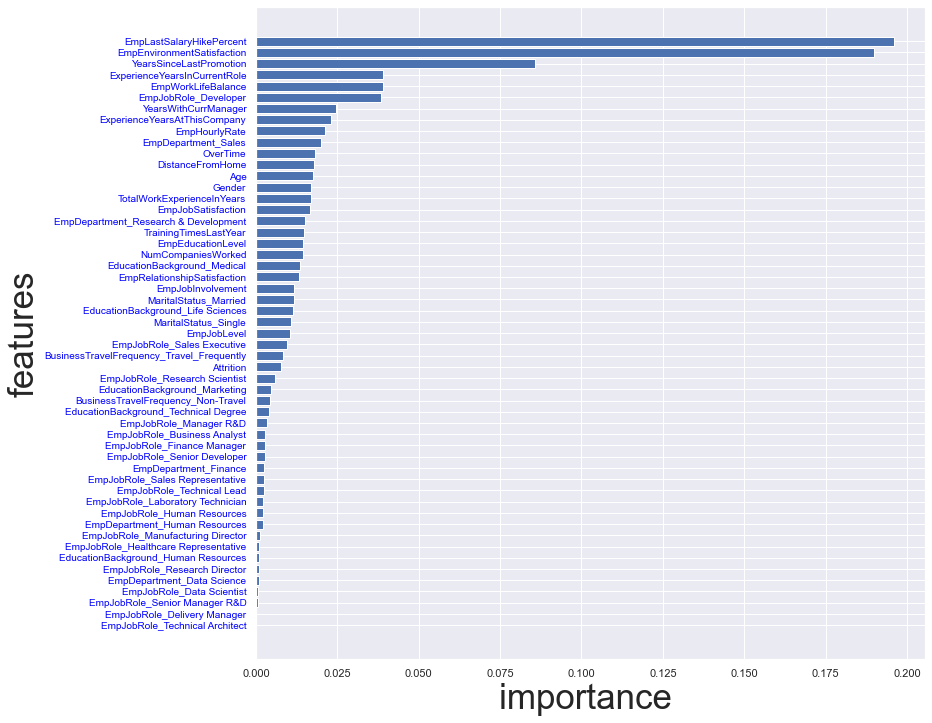

In [80]:
# visulizing feature importance 
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,12
plt.barh(range(len(feature_importance['importance'])), feature_importance['importance'])
plt.yticks(range(len(feature_importance['Columns'])), feature_importance['Columns'],color='blue',fontsize=10)
plt.xlabel("importance ",fontsize=35)
plt.ylabel("features",fontsize=35)
plt.show()

**The Top 3 important factors affecting the employee performance**
1. Employee Last Salary Hike Percentage
2. Employment Environment Satisfaction
3. Years Since Last Promotion
**We will Choose Random Forest Classifier algorithm with default parameters, which gives us the accuracy of 97%.**

----------